<a href="https://colab.research.google.com/github/RyosukeHanaoka/TechTeacher/blob/main/Data_Analysis20231019_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
RA group - Mean age: 69.79, Median age: 72.0, Standard Deviation: 13.31, Q1: 64.0, Q3: 80.0
Control group - Mean age: 39.13, Median age: 37.0, Standard Deviation: 12.19, Q1: 30.0, Q3: 47.0
RA group age distribution:
10-14: 0
15-19: 0
20-24: 1
25-29: 1
30-34: 3
35-39: 2
40-44: 2
45-49: 11
50-54: 13
55-59: 11
60-64: 20
65-69: 36
70-74: 34
75-79: 32
80-84: 42
85-89: 14
90-94: 6
95-99: 1

Control group age distribution:
10-14: 0
15-19: 28
20-24: 99
25-29: 156
30-34: 208
35-39: 197
40-44: 160
45-49: 156
50-54: 89
55-59: 46
60-64: 24
65-69: 45
70-74: 8
75-79: 6
80-84: 2
85-89: 1
90-94: 0
95-99: 0


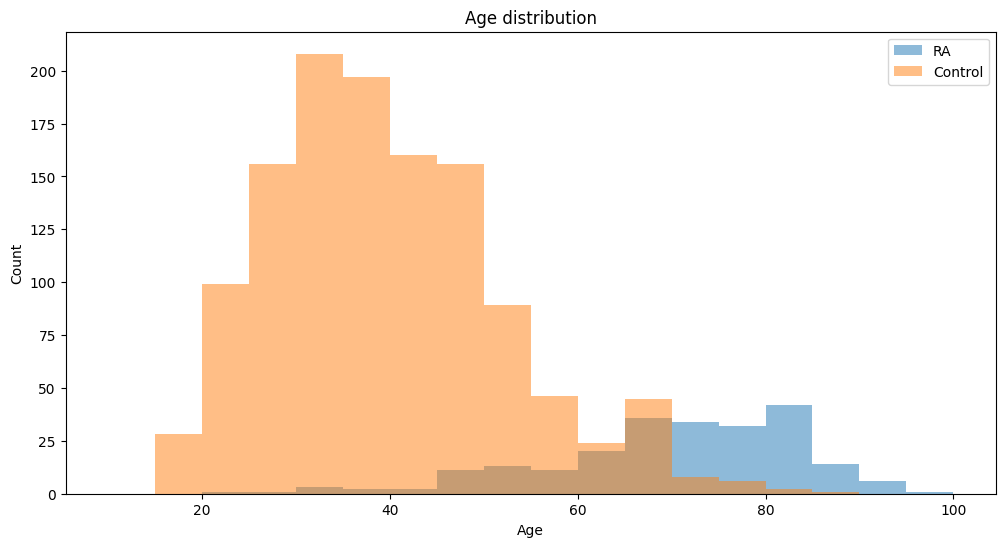

RA group - Female counts:
1    167
0     62
Name: female, dtype: int64
Control group - Female counts:
1.0    660
0.0    565
Name: female, dtype: int64


In [4]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Google Driveのマウント
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# データの読み込み
ra_df = pd.read_csv("/content/drive/MyDrive/OptPhotoFiles/optPhotoTable/optPhotoTable_RA.csv")
control_df = pd.read_csv("/content/drive/MyDrive/OptPhotoFiles/optPhotoTable/optPhotoTable_controls.csv")

# 統計量の計算
def get_statistics(df, column_name):
    mean = df[column_name].mean()
    median = df[column_name].median()
    std = df[column_name].std()
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    return mean, median, std, q1, q3

mean_ra, median_ra, std_ra, q1_ra, q3_ra = get_statistics(ra_df, "age")
mean_control, median_control, std_control, q1_control, q3_control = get_statistics(control_df, "age")

# 結果の表示
print(f"RA group - Mean age: {mean_ra:.2f}, Median age: {median_ra}, Standard Deviation: {std_ra:.2f}, Q1: {q1_ra}, Q3: {q3_ra}")
print(f"Control group - Mean age: {mean_control:.2f}, Median age: {median_control}, Standard Deviation: {std_control:.2f}, Q1: {q1_control}, Q3: {q3_control}")

# 5歳刻みの度数分布
bins = list(range(10, 105, 5))
ra_hist_values, _ = np.histogram(ra_df["age"], bins=bins)
control_hist_values, _ = np.histogram(control_df["age"], bins=bins)

print("RA group age distribution:")
for i in range(len(bins)-1):
    print(f"{bins[i]}-{bins[i+1]-1}: {ra_hist_values[i]}")

print("\nControl group age distribution:")
for i in range(len(bins)-1):
    print(f"{bins[i]}-{bins[i+1]-1}: {control_hist_values[i]}")

# ヒストグラムの表示
plt.figure(figsize=(12, 6))
plt.hist(ra_df["age"], bins=bins, alpha=0.5, label="RA")
plt.hist(control_df["age"], bins=bins, alpha=0.5, label="Control")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# femaleの度数
ra_female_counts = ra_df["female"].value_counts()
control_female_counts = control_df["female"].value_counts()

print(f"RA group - Female counts:\n{ra_female_counts}")
print(f"Control group - Female counts:\n{control_female_counts}")
